In [2]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Jesús Armando Cañas Gamboa

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [1]:
def derivada(f,x, tol = 1e-8):
  '''
  Esta funcion calcula la derivada de una funcion usando diferencias centradas
  en un punto

  Entradas:
  f: funcion callale
  x: valor donde se va a calcular la derivada

  Salida
  Array con los valores de la derivada con diferentes
  valores de h,y array con los valores de h
  '''


  N = 100 #Maximo de iteraciones

  valores_h = [0.1] #Valores de h, lo empezamos en 1

  fprime = [100] #Lo empezamos en un valor inicial

  h = 0.1 # Valor inicial de h

  for i in range(1, N): #Iteramos con un maximo de iteraciones

    valores_h.append(h) #Agramos el valor de h
    fprime.append(0) #Agragamos un elemento para poder iterar

    fprime[i] = (f(x + h) - f(x - h))/(2*h) #Calculamos el valor de la derivada para el h

    if abs(fprime[i-1]- fprime[i]) <= tol: #Miramos si el valor cumple con la tolerancia
        break #Si es asi rompemos el ciclo


    h *= 0.1 #Actualizamos el h

  return fprime[1:], valores_h[1:] #Retornamos desde el segundo termino

In [3]:
f = lambda x: 3**x #Definimos la función
x = 2 #Punto

f_p, h = derivada(f, x) #Calculo de los arrays


In [4]:
print(f_p, h) #Impriminos

[9.90741213869141, 9.887709494557216, 9.88751258696574, 9.887510617909708, 9.887510598272083, 9.887510598716172] [0.1, 0.010000000000000002, 0.0010000000000000002, 0.00010000000000000003, 1.0000000000000004e-05, 1.0000000000000004e-06]


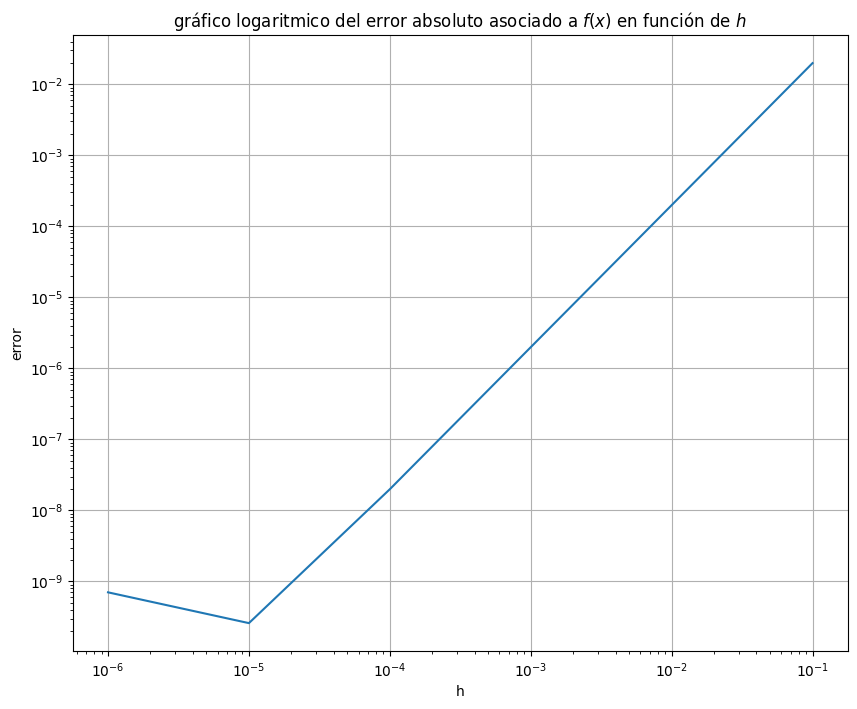

In [5]:
f_prime = lambda x : 3**x * np.log(3) #Definimos la funcion asociada a la derivada original
valor = f_prime(x) #Calculalos el valor correspondiente a la  derivada en 2
error = abs(valor - f_p) #Calculo del error
#GRaficamos
plt.figure(figsize = (10,8))
plt.title('gráfico logaritmico del error absoluto asociado a $f(x) $ en función de $h$')
plt.xlabel('h')
plt.ylabel('error')
plt.loglog(h, error, label = 'Error en función de h')
plt.grid()
plt.show()

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [6]:
r = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0]) #Array con los valores de r
v_r = np.array([2, 1.92, 1.68, 1.28, 0.72, 0]) #Array

In [7]:
v_r_lagrange = lagrange(r, v_r) #Polinomio de interpolación de lagrange
print(v_r_lagrange) #Imprimimos
v_r_Cubicspline = CubicSpline(r, v_r) #Polinomio de interpolacion de CUbicSPline

            5             4            3     2
-2.132e-13 x + 3.979e-13 x - 1.99e-13 x - 2 x - 2.398e-14 x + 2


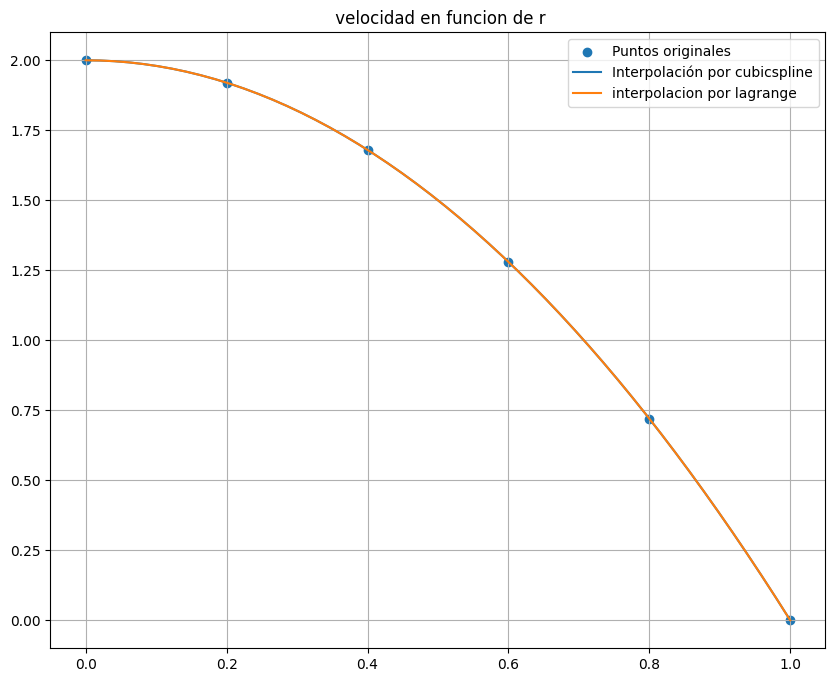

In [8]:
r_inter = np.linspace(min(r), max(r)) #VAlores a graficar
#Grafico
plt.figure(figsize=(10,8))
plt.title(' velocidad en funcion de r')
plt.scatter(r, v_r, label = 'Puntos originales')
plt.plot(r_inter, v_r_Cubicspline(r_inter), label = 'Interpolación por cubicspline')
plt.plot(r_inter, v_r_lagrange(r_inter), label = 'interpolacion por lagrange')
plt.grid()
plt.legend()
plt.show()

In [9]:
derivada_gradient = np.gradient(v_r_Cubicspline, 1e-4) #Derivada usando gradient

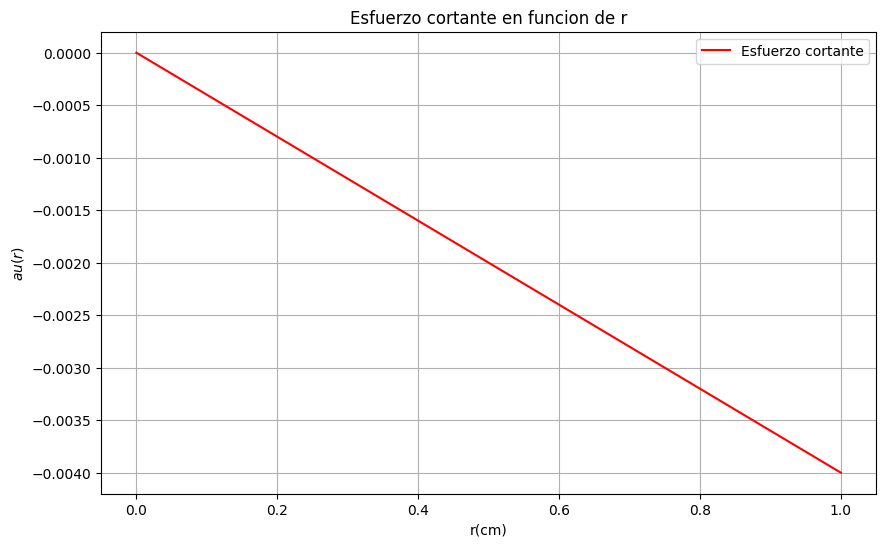

In [10]:
r = np.linspace(0, 1, 1000) #Array para graficar

derivada = v_r_Cubicspline.derivative() #Función de la derivada usando derivative

miu = 0.001 #Valor de miu
ezfuerzo_cortante = lambda r: miu* derivada(r) #Funcion del esfuerzo cortante

#Grafico
plt.figure(figsize = (10,6))
plt.title('Esfuerzo cortante en funcion de r')
plt.plot(r, ezfuerzo_cortante(r), label = 'Esfuerzo cortante', color = 'red')
plt.xlabel('r(cm)')
plt.ylabel('$\tau(r)$')
plt.legend()
plt.grid()
plt.show()


# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [11]:
#Usando la forma iterativa de quad
def integral_z(y, x): #Integral mas interna
  integrando = lambda z: x* y * z #Función a integrar en función de la variable mas interna
  integral, _ = quad(integrando, 0, 1- x-y) # Valor de la integral usando quad
  return integral #Retornamos

def integral_y(x): #Integral intermedia
  integrando = lambda y : integral_z(y, x) #Funcion a integrar de la variable intermedia
  integral, _ = quad(integrando, 0, 1-x) #Valor de la integral
  return integral #Retornamos

integral, _ = quad(integral_y, 0, 1) # Calculo de la integral de la veriable externa(x)
print(f'La masa total del solido es {integral:.5f} kg') #Imprimimos

La masa total del solido es 0.00139 kg


In [13]:
f = lambda z, y, x : x*y*z #Definimos la funcion a integrar

#Limites de integración
a = 0
b = 1
g = 0
h = lambda x: 1-x
q = 0
r = lambda x, y : 1 - x- y

#Integral usando triplequad
integral, _ = tplquad(f, a, b, g, h, q, r)

In [14]:
print(f'La masa total del solido es {integral:.5f} kg') #Imprimimos

La masa total del solido es 0.00139 kg


In [15]:
#Momento de inercia 1
#Usando la forma iterativa de quad

def integral_z(y, x): #Integral mas interna
  integrando = lambda z: (x**2 + y**2)* x* y * z #Función a integrar en función de la variable mas interna
  integral, _ = quad(integrando, 0, 1- x-y) # Valor de la integral usando quad
  return integral #Retornamos

def integral_y(x): #Integral intermedia
  integrando = lambda y : integral_z(y, x) #Funcion a integrar de la variable intermedia
  integral, _ = quad(integrando, 0, 1-x) #Valor de la integral
  return integral #Retornamos

integral, _ = quad(integral_y, 0, 1) # Calculo de la integral de la veriable externa(x)
print(f'El momento de inercia con respecto a z es {integral:.5f} ') #Imprimimos

El momento de inercia con respecto a z es 0.00030 


In [16]:
#Momento de inercia 2
#Usando la forma iterativa de quad

def integral_z(y, x): #Integral mas interna
  integrando = lambda z:(z**2 + y**2)* x* y * z #Función a integrar en función de la variable mas interna
  integral, _ = quad(integrando, 0, 1- x-y) # Valor de la integral usando quad
  return integral #Retornamos

def integral_y(x): #Integral intermedia
  integrando = lambda y : integral_z(y, x) #Funcion a integrar de la variable intermedia
  integral, _ = quad(integrando, 0, 1-x) #Valor de la integral
  return integral #Retornamos

integral, _ = quad(integral_y, 0, 1) # Calculo de la integral de la veriable externa(x)
print(f'El momento de inercia con respecto a x es {integral:.5f} ') #Imprimimos

El momento de inercia con respecto a x es 0.00030 
